<a href="https://colab.research.google.com/github/jiinpark21/ESAA_24-1/blob/main/2%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_0315.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과제 : 파이썬 머신러닝 판다스 데이터분석

part4. 2~3 pg. 147-169

### Seaborn 라이브러리 - 고급 그래프 도구
Matplotlib의 기능과 스타일을 확장한 하이썬 시각화 도구의 고급 버전

- 회귀선이 있는 산점도
  - regplot() : 서로 다른 2개의 연속 변수 사이의 산점도 + 선형회귀분석에 의한 회귀선
          (fit_reg=False 이면 회귀선 안보임)
  - set.style() : 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)


- 히스토그램/커널 밀도 그래프
단변수 데이터의 분포를 확인
  - distplot() : 기본값으로 히스토그램과 커널 밀도 함수 출력
          (hist=False이면 히스토그램 표시 X, kde=False이면 커널 밀도 그래프 표시 X)
  - kedplot() : 커널 밀도 함수
          커널 밀도 함수 : 그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수
  - hisplot() : 히스토그램


- 히트맵
  - heatmap() : 2개의 범주형 변수를 각각 x,y 축에 놓고 데이터를 매트릭스 형태로 분류
  - pivot_table() :
      
      aggfunc='size' 옵션; 데이터 값의 크기를 기준으로 집계

- 범주형 데이터의 산점도
  - stripplot() : 데이터 분산 미고려
  - swarmplot() : 데이터의 분산 고려하여, 데이터 포인트가 서로 중복되지 않도록 그림
          hue='x' : x열의 데이터 값을 색상으로 구분하여 출력

- 막대 그래프
  - barplot() : 막대 그래프 그리기
          dodge='False' : 축 방향으로 분리하지 않고 누적 그래프 출력

- 빈도 그래프
  - countplot() : 각 범주를 막대 그래프로 나타냄
          palette='' : 그래프의 색 구성을 다르게 함


- 박스 플롯/바이올린 그래프

  - boxplot() : 범주형 데이터 분포와 주요 통계 지표 제공
  - violinplot() : 바이올린 그래프 = 박스 플롯 + 커널 밀도 함수(y축 방향)


- 조인트 그래프
  - jointplot() : 산점도 + x-y축에 각 변수에 대한 히스토그램
          산점도 -> 기본값
          kind='reg' : 회귀선 추가
          kind='hex' : 육각 산점도
          kind='ked' : 커널 밀집 그래프

- 조건을 적용하여 화면을 그리드로 분할하기
  - FacetGrid() : 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯 만듦
  - map() : 그래프 적용하기

- 이변수 데이터의 분포
  - pairplot() : 인자로 전달된 df의 열을 2개씩 짝 지을 수 있는 모든 조합에 대해 표현

-  데이터셋 가져오기

In [1]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

- 회귀선이 있는 산점도

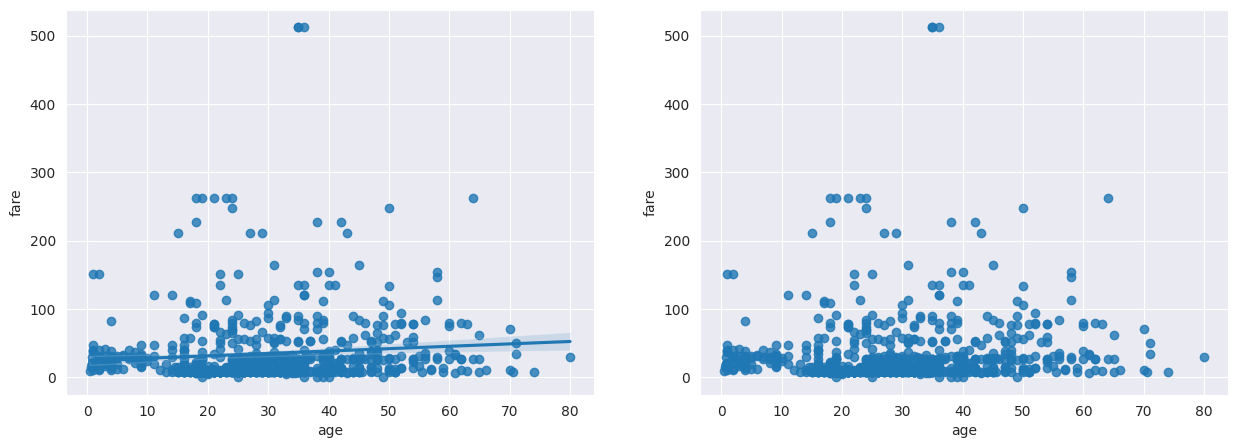

In [3]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',        # x축 변수
            y='fare',       # y축 변수
            data=titanic,   # 데이터
            ax=ax1)         # axe 객체 - 1번째 그래프

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',        # x축 변수
            y='fare',       # y축 변수
            data=titanic,   # 데이터
            ax=ax2,         # axe 객체 - 2번째 그래프
            fit_reg=False)  # 회귀선 미표시

plt.show()

- 히스토그램/커널 밀도 그래프

<ipython-input-4-8bb709e94cb3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax=ax1)


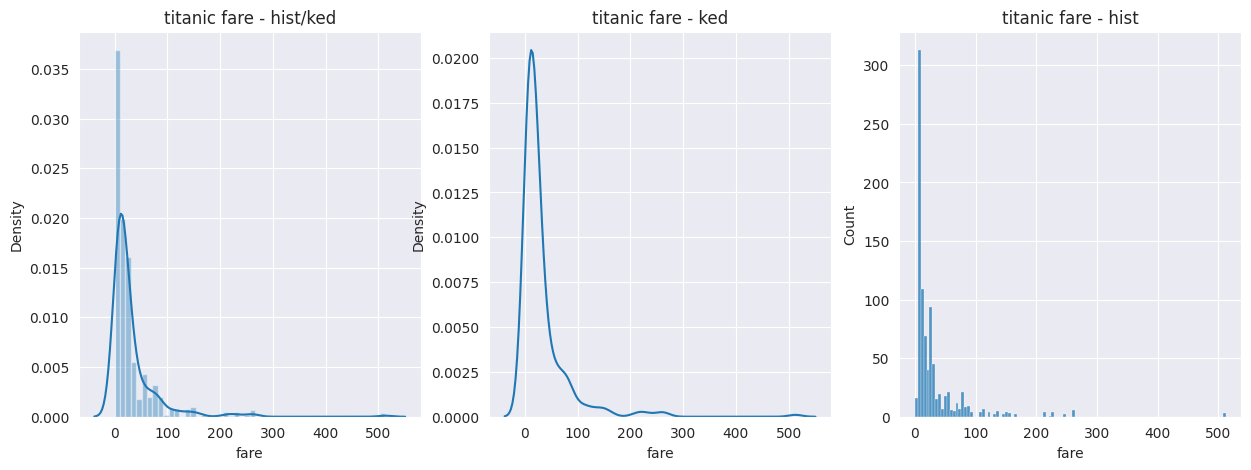

In [4]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot
sns.distplot(titanic['fare'], ax=ax1)

# kdeplot
sns.kdeplot(x='fare', data = titanic, ax=ax2)

# histplot
sns.histplot(x='fare', data = titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

- 히트맵

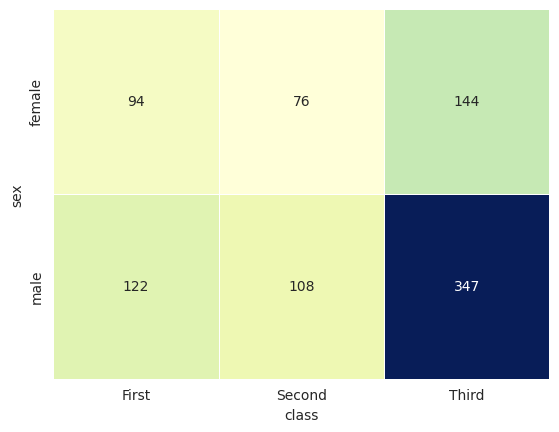

In [5]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                  # 데이터 프레임
            annot=True, fmt='d',    # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu',          # 컬러 맵
            linewidth=.5,           # 구분 선
            cbar=False)             # 컬러 바 표시 여부

plt.show()

- 범주형 데이터의 산점도

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


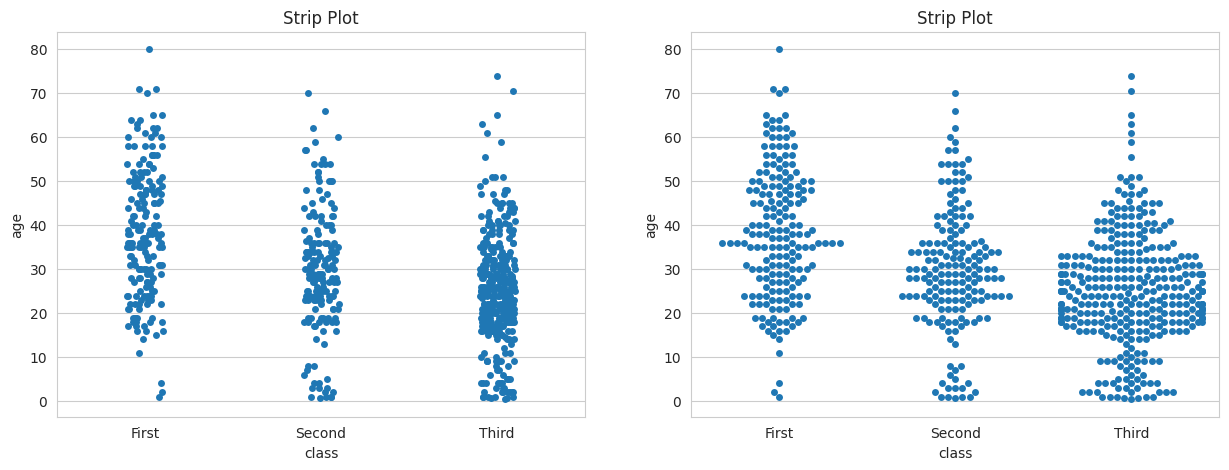

In [8]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포 - 데이터 분산 미고려(중복 표시 O)
sns.stripplot(x='class',        # x축 변수
              y='age',          # y축 변수
              data=titanic,     # 데이터
              ax=ax1)           # axe 객체 - 1번째 그래프

# 이산형 변수의 분포 - 데이터 분산 고려(중복 표시 X)
sns.swarmplot(x='class',        # x축 변수
              y='age',          # y축 변수
              data=titanic,     # 데이터
              ax=ax2)           # axe 객체 - 2번째 그래프

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

- 막대 그래프

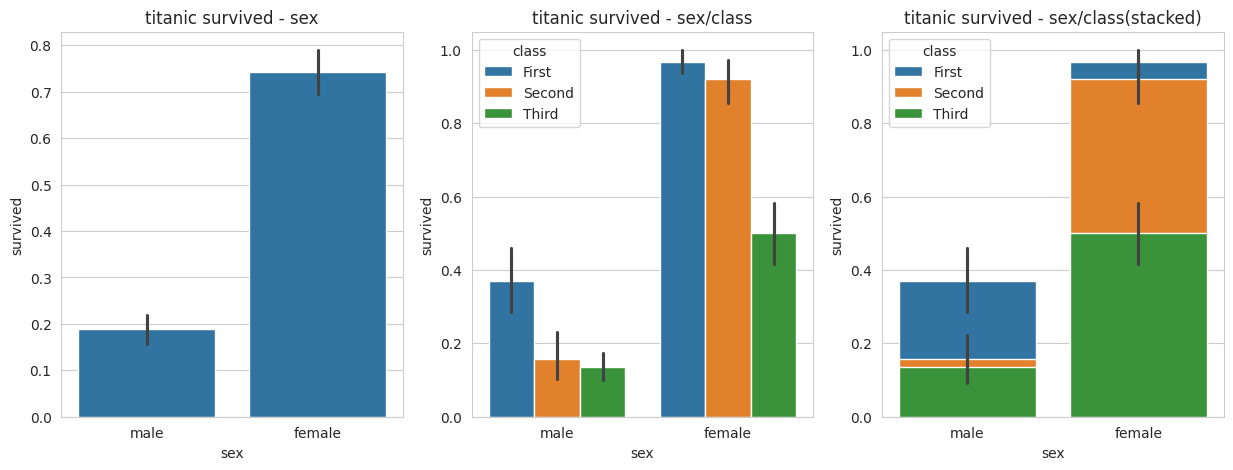

In [9]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

- 빈도 그래프

<ipython-input-12-7eda65aa4550>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)


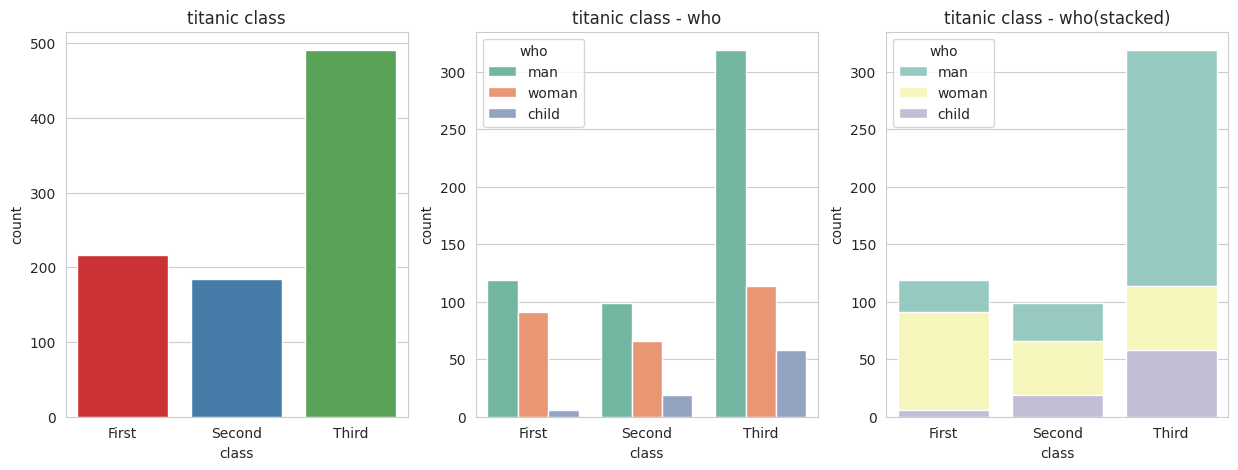

In [12]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)

# dodge=False 옵션 추가(축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

- 박스 플롯/바이올린 그래프

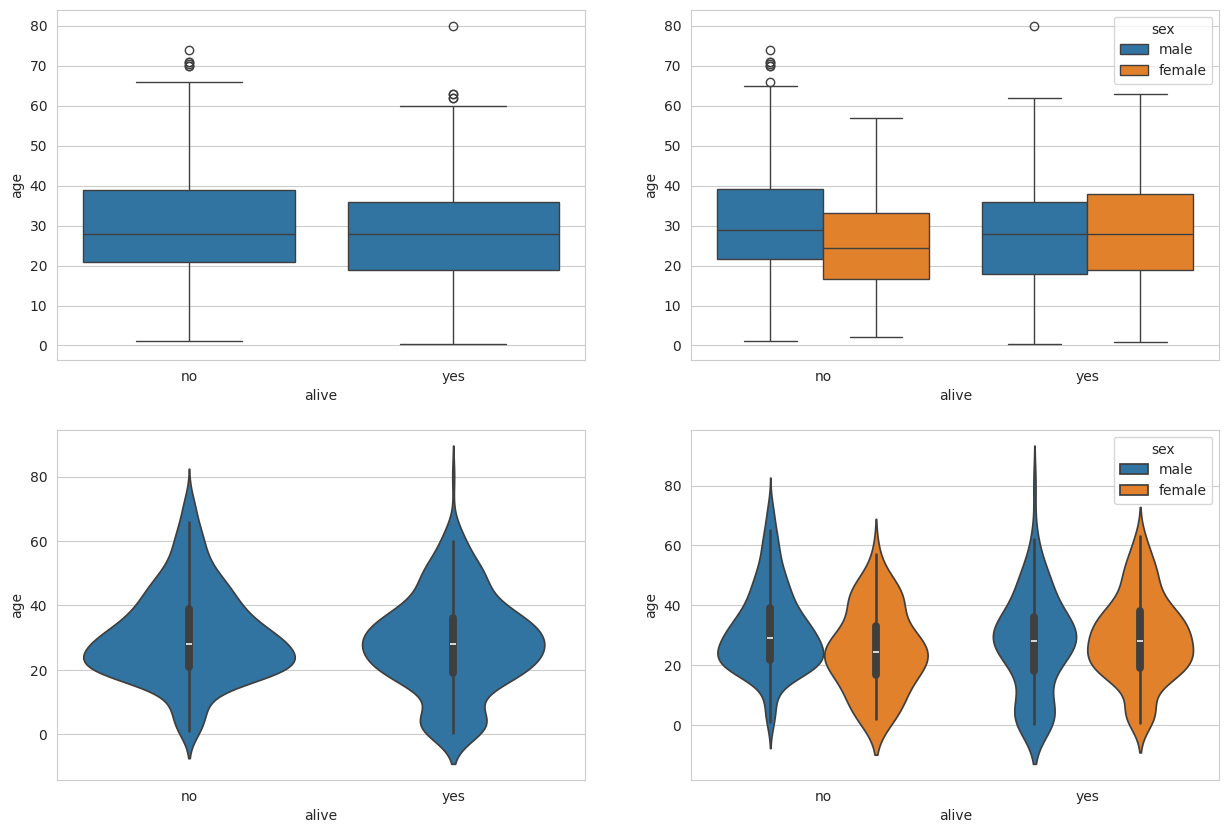

In [15]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 4개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스 플롯 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

# 박스 플롯 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

# 바이올린 그래프 플롯 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)

# 바이올린 그래프 플롯 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

- 조인트 그래프

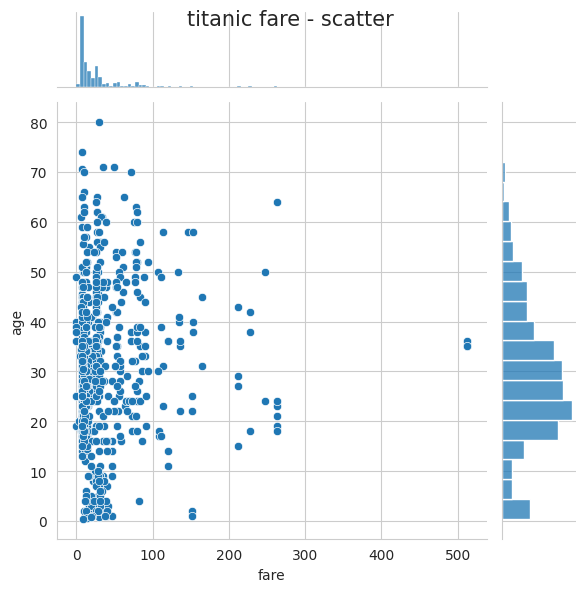

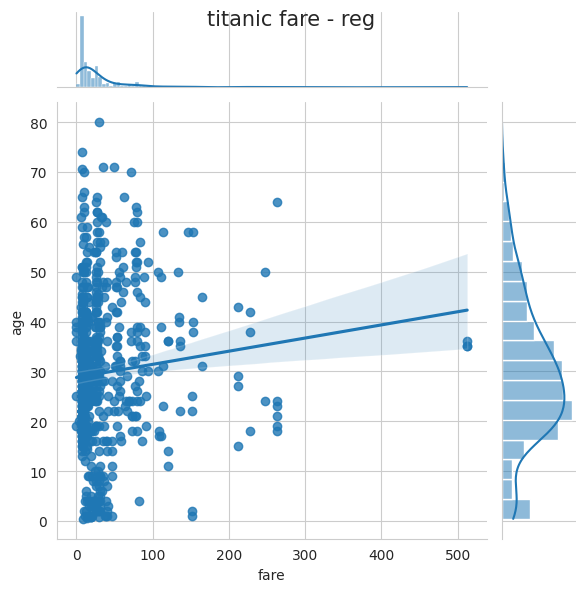

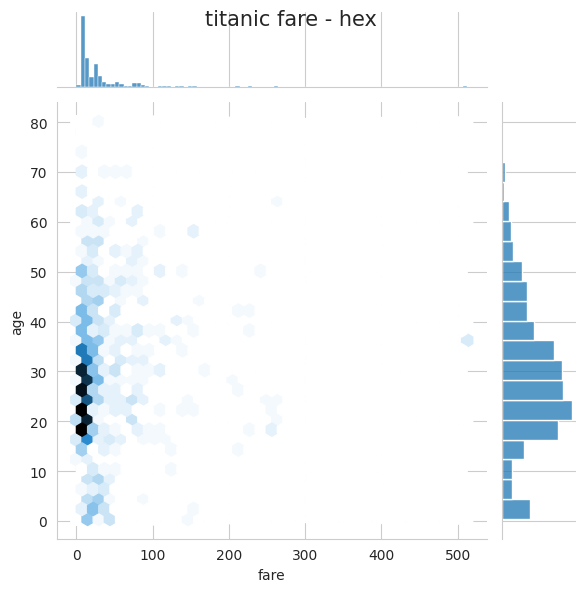

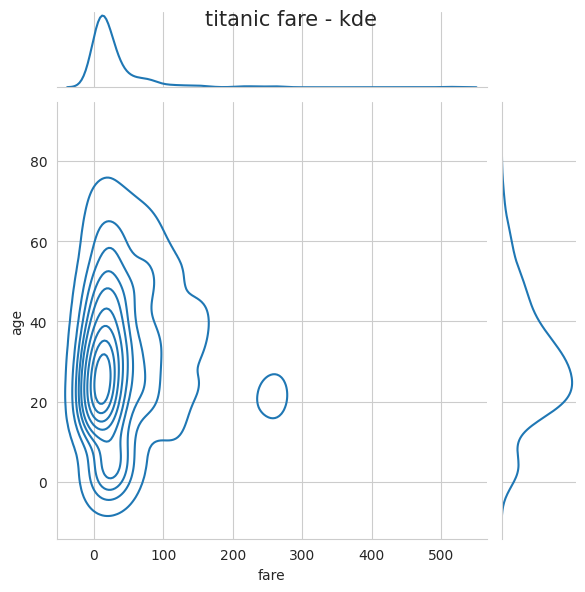

In [16]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조인트 그래프 - 산점도(기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic)

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)

# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

- 조건을 적용하여 화면을 그리드로 분할하기

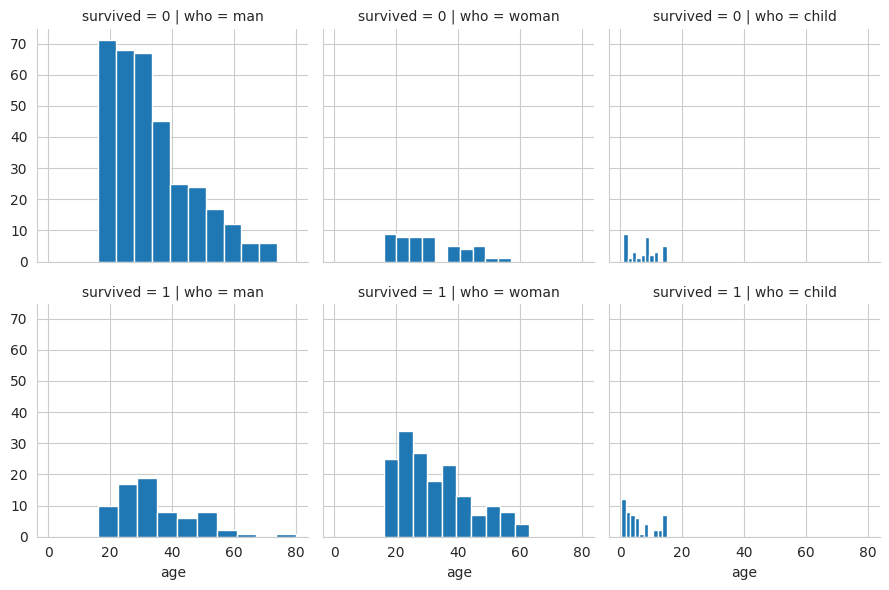

In [17]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived')

# 그래프 적용하기
g = g.map(plt.hist, 'age')

- 이변수 데이터의 분포

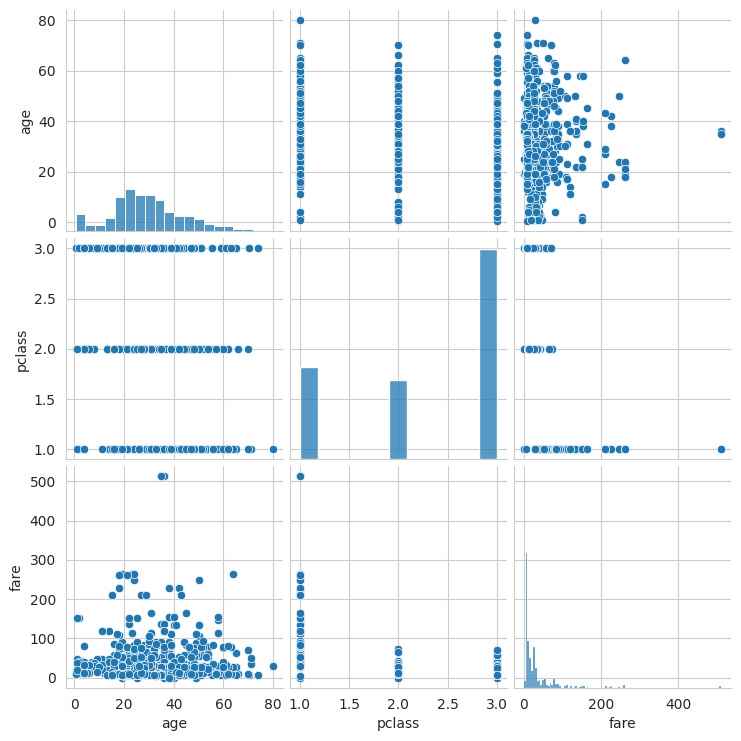

In [18]:
# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass','fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

### Folium 라이브러리 - 지도 활용

-Folium 라이브러리의 Map() 함수를 이용하면 지도 객체를 만들 수 있고, 지도 화면은 zoom,scroll 가능

-웹 기반 지도를 만들기 대문에 지도를 보려면 HTML 파일로 저장한 뒤, 웹으로 파일을 열어야 함

- 지도 만들기
  - map() : 지도 객체 생성
        location :  옵션에 [위도, 경도] 입력
        zoom_start :  화면 확대 비율 조정
        tiles : 지도에 적용하는 스타일 지정 (Stamen Terrain, Stamen Toner...)
  - save() : 지도 저장

- 지도에 마커 표시하기
  - Marker() : 위도, 경도 정보 전달하여 지도에 마커 표시
        popup=name : 마커를 클릭했을 때 나타나는 팝업창에 텍스트 표시
  - CircleMarker() : 원형 마커
        radius : 마커의 크기
        fill_opacity : 투명도

- 지도 영역에 단계구분도(Choropleth Map) 표시하기

-경계에 둘러싸인 영역에 색을 칠하거나 음영 등으로 정보를 나타내는 시각화 방법
  - Choropleth() : 단계구분도 표시

  <br>
  

- Folium 설치하기
- 지도 만들기

In [19]:
# 라이브러리 불러오기
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul.html')


- 지도 스타일 적용하기

In [20]:
# 라이브러리 불러오기
import folium

# 서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                        zoom_start=12)
seoul_map3 = folium.Map(location=[37.55, 126.98], tiles='Stamen Toner',
                        zoom_start=15)

# 지도를 HTML 파일로 저장하기
seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')

- 지도에 마커 표시하기

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# 라이브러리 불러오기
import pandas as pd
import folium

# 대학교 리스트를 데이터프레임으로 변환
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/서울지역 대학교 위치.xlsx', engine='openpyxl')

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                       zoom_start=12)

# 대학교 위치 정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.Marker([lat,lng], popup=name).add_to(seoul_map)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul_colleges.html')

In [25]:
# 대학교 위치 정보를 CircleMarker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat,lng],
                      radius=10,          # 원의 반지름
                      color='brown',      # 원의 둘레 색상
                      fill=True,
                      fill_color='coral', # 원을 채우는 색
                      fill_opacity=0.7,   # 투명도
                      popup=name
                      ).add_to(seoul_map)

# 지도를 HTML 파일로 저장하기
seoul_map.save('/content/drive/MyDrive/Colab Notebooks/seoul_colleges2.html')

- 지도 영역에 단계구분도(Choropleth Map) 표시하기

In [28]:
# 라이브러리 불러오기
import pandas as pad
import folium
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = '/content/drive/MyDrive/Colab Notebooks/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine='openpyxl')
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = '/content/drive/MyDrive/Colab Notebooks/경기도행정구역경계.json'
try:
  geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
  geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502, 126.982],
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택(2007~2017년 중에서 선택)
year = '2007'

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,
                  data = df[year],
                  columns = [df.index, df[year]],
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                  threshold_scale=[10000,100000,300000, 500000, 700000],
                  key_on='feature.properties.name',
                  ).add_to(g_map)

# 지도를 HTML 파일로 저장하기
g_map.save('/content/drive/MyDrive/Colab Notebooks/gyonggi_population'+ year + '.html')